# 80 Cereals

This dataset is used from [kaggle](https://www.kaggle.com/datasets/crawford/80-cereals)

## Overview

## Data

**Name**: Name of cereal <br>
**mfr**: Manufacturer of cereal <br>
    A = American Home Food Products; <br>
    G = General Mills <br>
    K = Kelloggs <br>
    N = Nabisco <br>
    P = Post <br>
    Q = Quaker Oats <br>
    R = Ralston Purina <br>
**type**: <br>
    cold <br>
    hot <br>
**calories**: calories per serving <br>
**protein**: grams of protein <br>
**fat**: grams of fat <br>
**sodium**: milligrams of sodium <br>
**fiber**: grams of dietary fiber <br>
**carbo**: grams of complex carbohydrates <br>
**sugars**: grams of sugars <br>
**potass**: milligrams of potassium <br>
**vitamins**: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended <br>
**shelf**: display shelf (1, 2, or 3, counting from the floor) <br>
**weight**: weight in ounces of one serving <br>
**cups**: number of cups in one serving <br>
**rating**: a rating of the cereals (Possibly from Consumer Reports?) <br>

These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found [here](https://perso.telecom-paristech.fr/eagan/class/igr204/datasets)

## Inspiration
Eat too much sugary cereal? Ruin your appetite with this dataset!

## Exploring dataset

In [76]:
# importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
data = pd.read_csv('cereal.csv')
data.head()

name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843

In [11]:
# let's check for null values
data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

Damn! You won't get to handle the missing values. :D

In [12]:
# making a copy for further analysis and to keep orignal data untouched
cereals = data.copy()
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [15]:
# checking shape of dataframe and number of unique values in each column in dataframe
print(cereals.shape)
cereals.nunique()

(77, 16)


name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [27]:
# Cereals with type == "C"
cereals[cereals['type']=='C']

name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0     5.0       6     280        25      3     1.0  0.33  68.402973  
1     8.0       8     135         0      3     1.0  1.00  33.983679  
2     7.0       5     320        25      3     1.0  0.33  59.425505  
3     8.0       0     330        25      3     1.0  0.50  93.704912  
4    14.0       8      -1        25      3     1.0  0.75  34.384843  
..    ...     ...     ...       ...    ...     ...   ...        ...  
72   21.0       3      60        25      3     1.0  0.75  39.106174  
73   13.0      12      25        25      2     1.0  1.00  27.753301  
74   17.0       3     115        25      1     1.0  0.67  49.787445  
75   17.0       3     110        25      1     1.0  1.00  51.592193  
76   16.0       8      60        25      1     1.0  0.75  36.187559  

[74 rows x 16 columns]

In [28]:
# Cereals with type == "C"
cereals[cereals['type']=='H']

name mfr type  calories  protein  fat  sodium  fiber  \
20  Cream of Wheat (Quick)   N    H       100        3    0      80    1.0   
43                   Maypo   A    H       100        4    1       0    0.0   
57          Quaker Oatmeal   Q    H       100        5    2       0    2.7   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
20   21.0       0      -1         0      2     1.0  1.00  64.533816  
43   16.0       3      95        25      2     1.0  1.00  54.850917  
57   -1.0      -1     110         0      1     1.0  0.67  50.828392

In [45]:
# This dataframe has 244 lines, but 4 distinct values for `day`

fig = px.pie(cereals, values='rating', names='type',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

- About 95% of all the cereals is of type 'C' and only 5% is type 'H'

In [39]:
cereals['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

{'A': 'American Home Food Products',
 'G': 'General Mills',
 'K': 'Kelloggs',
 'N': 'Nabisco',
 'P': 'Post',
 'Q': 'Quaker Oats',
 'R': 'Ralston Purina'}

In [52]:
# exploring the manufacturor of cereals

fig = px.pie(cereals, names='mfr',
             color='mfr',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Distribution of cereals manufacturer can be seen above.<br>
- More than half of cereals are manufactured by 'Kelloggs' and 'General Mills'. <br>
- 'American Home Food Products' produces least cereals.<br>

<AxesSubplot:xlabel='rating', ylabel='fat'>

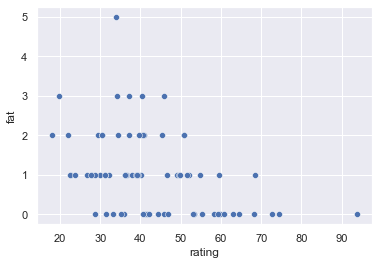

In [73]:
# Let's check relation between 'calories' and 'fat' with rating of cereals
sns.set(style='darkgrid')
sns.scatterplot(x="rating", y="fat", data=cereals)

- So there's a slight negative correlaion between fat and rating of cereals

<AxesSubplot:xlabel='rating', ylabel='calories'>

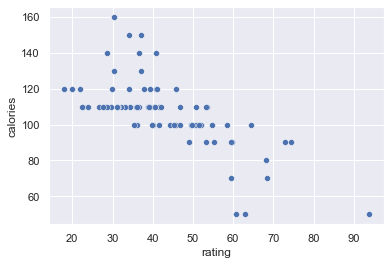

In [74]:
sns.set(style='darkgrid')
sns.scatterplot(x="rating", y="calories", data=cereals)

We can't have a firm word on that, so let's check further

<AxesSubplot:xlabel='calories', ylabel='fat'>

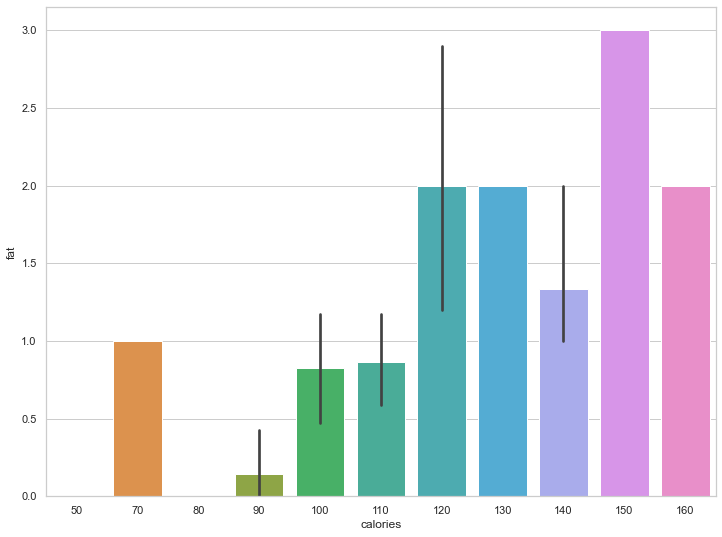

In [83]:
plt.figure(figsize=(12,9))
sns.set_style("whitegrid")

sns.barplot(data=cereals,x='calories', y='fat')

Fat and calories defeinitely have some correlation between them

**Which shelf shall I pick cereal from?**

Text(0.5, 1.0, 'Shelf wise distribution of cereals Count')

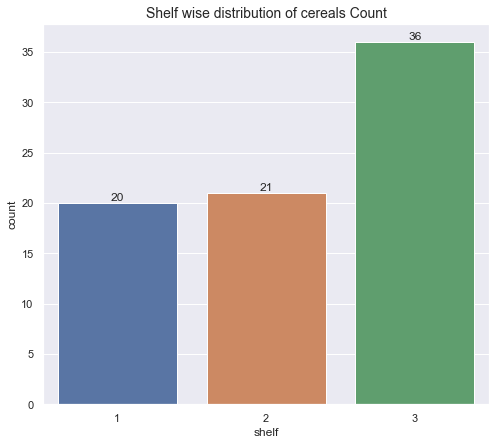

In [93]:
plt.figure(figsize=(8,7))
sns.set_style('darkgrid')
ax = sns.countplot(data=cereals, x='shelf')
ax.set(title='')
ax.bar_label(ax.containers[0])

plt.title('Shelf wise distribution of cereals Count', fontsize=14)

In [53]:
cereals.head()

name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843